# Age of Death

## Data Process

In [1]:
import time

import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

RANDOM_STATE = 666666

In [2]:
# Import Data

df = pd.read_csv('outputData.csv', sep=',')
df = df.dropna(subset = ['Age of Death'])
X = df[['Gender', 'Occupation', 'Country', 'Birth Year']]
Y = df['Age of Death']

In [3]:
# LabelEncoder

X_LE = np.zeros((len(X.T), len(X)))
LE = preprocessing.LabelEncoder()
for i in range(len(X.T)):
    LE.fit(X.T.to_numpy()[i])
    X_LE[i] = LE.transform(X.T.to_numpy()[i])
X_LE = X_LE.T

Y_np = Y.to_numpy()
for i in range(10, 110, 5):
    Y_np[np.where((Y_np >= i) & (Y_np < i+5))] = np.array([i for j in range(len(Y_np[np.where((Y_np >= i) & (Y_np < i+5))]))])
Y_np[np.where(Y_np < 10)] = np.array([5 for j in range(len(Y_np[np.where(Y_np < 10)]))])
Y_np[np.where(Y_np >= 115)] = np.array([115 for j in range(len(Y_np[np.where(Y_np >= 115)]))])

In [4]:
# Standzardization

X_S = np.zeros((len(X_LE.T), len(X_LE)))
for i in range(len(X_LE.T)):
    X_S[i] = (X_LE.T[i]-np.min(X_LE.T[i]))/(np.max(X_LE.T[i])-np.min(X_LE.T[i]))
X_S = X_S.T

In [5]:
# Create training and test data sets

x = X_S
y = Y_np.astype(int)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = RANDOM_STATE)

## SVM

In [6]:
gammas = np.arange(1,21,1)
train_scores_svc2 = []
test_scores_svc2 = []
num = 1
for gamma in gammas:
    print('Loop', num, ':')
    num = num + 1
    cls = svm.SVC(kernel =  "rbf", gamma = gamma)
    %time cls.fit(x_train, y_train)
    %time train_scores_svc2.append(cls.score(x_train, y_train))
    %time test_scores_svc2.append(cls.score(x_test, y_test))

# Plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(gammas, train_scores_svc2, label='Training_score')
ax.plot(gammas, test_scores_svc2, label='Testing_score')
ax.set_xlabel(r'gamma')
ax.set_ylabel(r'score')
ax.set_xscale('log')
ax.set_title('SVC with kernel = "rbf"')
ax.legend(loc='best')
plt.show()

Loop 1 :
CPU times: total: 1min 45s
Wall time: 1min 45s
CPU times: total: 9min 3s
Wall time: 9min 3s
CPU times: total: 2min 11s
Wall time: 2min 11s
Loop 2 :
CPU times: total: 1min 26s
Wall time: 1min 26s
CPU times: total: 10min 21s
Wall time: 10min 22s
CPU times: total: 2min 32s
Wall time: 2min 32s
Loop 3 :
CPU times: total: 1min 46s
Wall time: 1min 46s
CPU times: total: 9min 48s
Wall time: 9min 49s
CPU times: total: 2min 27s
Wall time: 2min 27s
Loop 4 :
CPU times: total: 1min 34s
Wall time: 1min 34s
CPU times: total: 9min 53s
Wall time: 9min 53s
CPU times: total: 2min 26s
Wall time: 2min 26s
Loop 5 :
CPU times: total: 1min 44s
Wall time: 1min 44s
CPU times: total: 9min 44s
Wall time: 9min 44s
CPU times: total: 2min 25s
Wall time: 2min 25s
Loop 6 :
CPU times: total: 1min 35s
Wall time: 1min 36s
CPU times: total: 9min 29s
Wall time: 9min 30s
CPU times: total: 2min 34s
Wall time: 2min 35s
Loop 7 :
CPU times: total: 2min 46s
Wall time: 2min 47s
CPU times: total: 14min 38s
Wall time: 14min

In [7]:
# Fitting SVC (kernel='rbf') model

optimise_gamma = gammas[test_scores_svc2.index(max(test_scores_svc2))]
print(optimise_gamma)

svc2 = svm.SVC(kernel =  "rbf", gamma = optimise_gamma)
%time svc2.fit(x_train, y_train)

# Return the mean accuracy on the given test data and labels.

%time svc2_score = svc2.score(x_test, y_test)
svc2_score

3
CPU times: total: 1min 10s
Wall time: 1min 10s
CPU times: total: 1min 46s
Wall time: 1min 46s


0.6155295891443648

## Figure

CPU times: total: 1min 46s
Wall time: 1min 46s


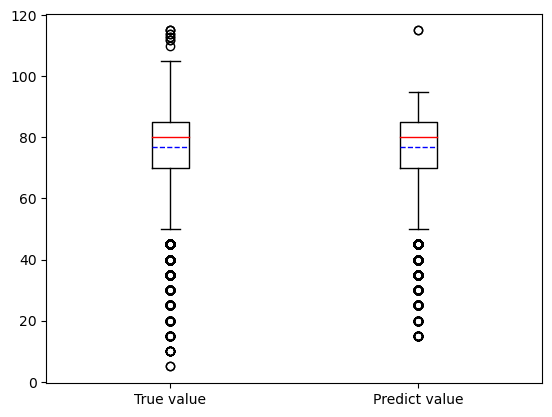

In [8]:
%time pre_svc2 = svc2.predict(x_test)
plt.boxplot([y_test, pre_svc2], medianprops = {'color': 'red'}, meanline = True, showmeans = True, meanprops = {'color': 'blue', 'ls': '--'}, labels = {'True value', 'Predict value'})
plt.show()